
# Project: Investigate No show appointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

- This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 
- 14 variables
### Question(s) for Analysis
- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

- Why do more 20% of patients miss their scheduled appointments?
- How Patient show up depends on Patient Gender?
- How Patient show up depends on SMS_received for his appionment?



## Import necessary libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [19]:
# Load your data 
df= pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
df.shape

(110527, 14)

we have here 110527 appointments and 14 factors of data

## If thier null values??

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [22]:
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [23]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [24]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

## Notes:-
- NO Null value found
- Age coulmn , there is no negtive age .
- Drop extra columns.
- Check duplicated values




### Data Cleaning

 

### NOW 
    - Age coulmn............negative number must remove it

In [25]:
df[df['Age'] < 0].index
df.drop(df[df['Age'] < 0].index, inplace=True)

In [26]:
df.shape

(110526, 14)

In [27]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [28]:
#drop appointments ID , Appointments Day,Patient ID, and scheduled day.

df.drop(['AppointmentID','PatientId','ScheduledDay','AppointmentDay'],axis = 1,inplace = True)
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [29]:
#Check duplicated values
for _ in df.columns:
    print(_,sum(df[_].duplicated()))

Gender 110524
Age 110423
Neighbourhood 110445
Scholarship 110524
Hipertension 110524
Diabetes 110524
Alcoholism 110524
Handcap 110521
SMS_received 110524
No-show 110524


In [31]:
#Get dummies for No-show column
df[['Show','Absent']] = pd.get_dummies(df['No-show'])

In [32]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Show,Absent
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,0


In [33]:
df.drop(['Absent','No-show'], inplace=True, axis=1)

<a id='eda'></a>
## Exploratory Data Analysis

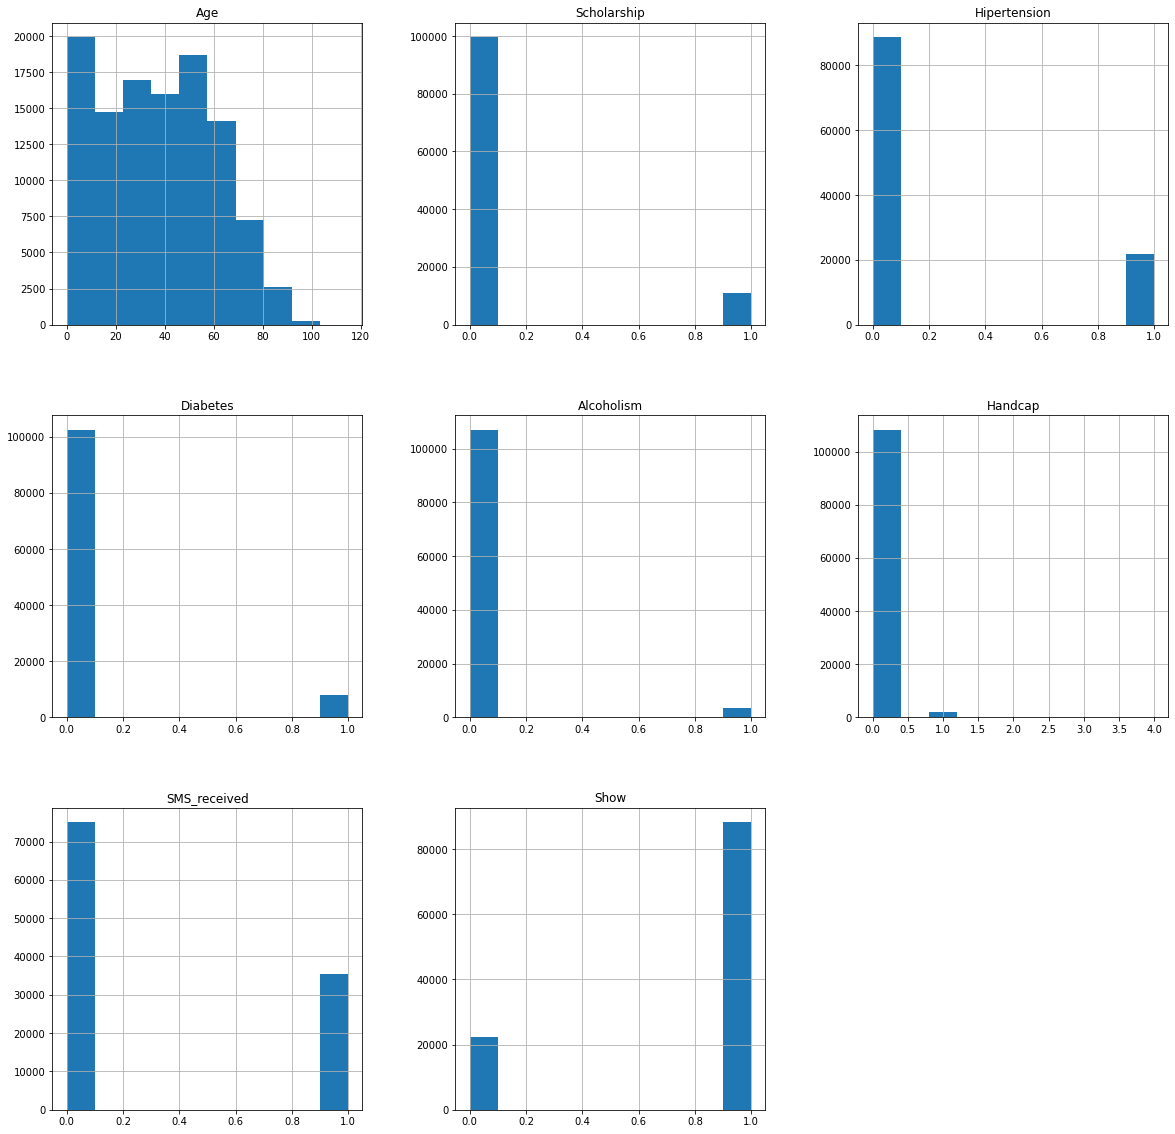

In [36]:
# histogram all data factors.
df.hist(figsize=(20,20));

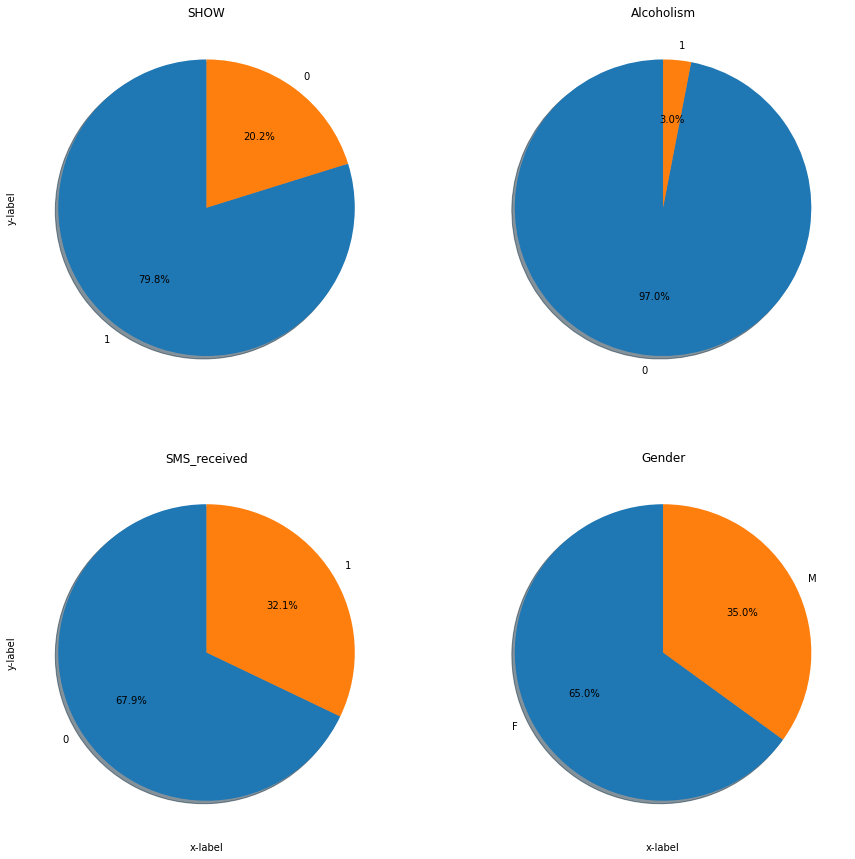

In [46]:
fig, axs = plt.subplots(2, 2,figsize=(15, 15))
axs[0, 0].pie(df.Show.value_counts().values,labels=df.Show.value_counts().index,autopct='%1.1f%%', shadow=True, startangle=90)
axs[0, 0].set_title('SHOW')
axs[0, 1].pie(df.Alcoholism.value_counts().values,labels=df.Alcoholism.value_counts().index,autopct='%1.1f%%', shadow=True, startangle=90)
axs[0, 1].set_title('Alcoholism')
axs[1, 0].pie(df.SMS_received.value_counts().values,labels=df.SMS_received.value_counts().index,autopct='%1.1f%%', shadow=True, startangle=90)
axs[1, 0].set_title('SMS_received')
axs[1, 1].pie(df.Gender.value_counts().values,labels=df.Gender.value_counts().index,autopct='%1.1f%%', shadow=True, startangle=90)
axs[1, 1].set_title('Gender')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

- It's about 20% Absent in Patient.
- Only near to 32.1 % had recived an SMS .
- The most patients are not alcoholic.
- The most patients didn't have Diabetes.
- The most patients are Female.

In [44]:
# - Unique values for each columns
for _ in df.columns:
    print(_,len(df[_].unique()))
    print((df[_].unique()),'\n')

Gender 2
['F' 'M'] 

Age 103
[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99] 

Neighbourhood 81
['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 

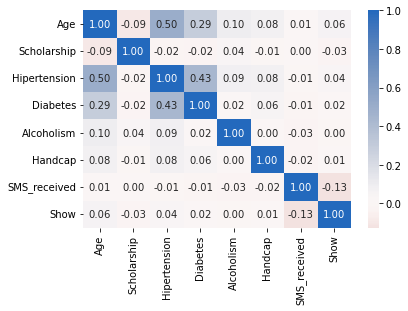

In [45]:
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

### Why do more 20% of patients miss their scheduled appointments?

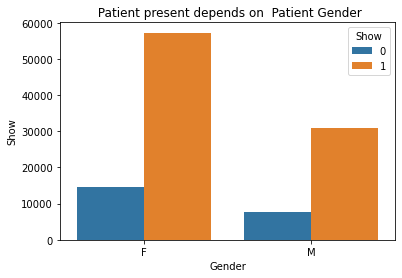

In [49]:
sb.countplot(data=df, x='Gender', hue='Show');
plt.title(' Patient present depends on  Patient Gender')
plt.legend(['0','1'], title='Show');
plt.xlabel('Gender')
plt.ylabel('Show');

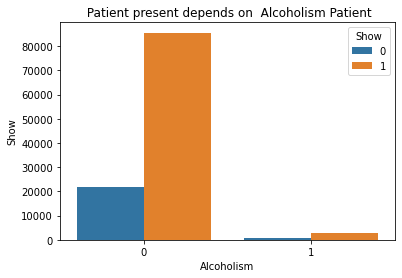

In [50]:
sb.countplot(data=df, x='Alcoholism', hue='Show');
plt.title(' Patient present depends on  Alcoholism Patient')
plt.legend(['0','1'], title='Show');
plt.xlabel('Alcoholism')
plt.ylabel('Show');

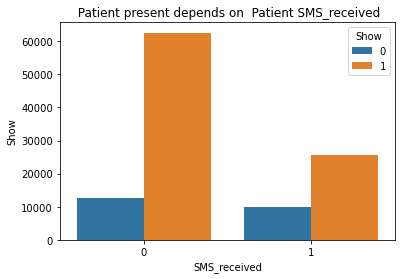

In [51]:
sb.countplot(data=df, x='SMS_received', hue='Show');
plt.title(' Patient present depends on  Patient SMS_received')
plt.legend(['0','1'], title='Show');
plt.xlabel('SMS_received')
plt.ylabel('Show');

### Question(s) for Analysis
- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

- Why do more 20% of patients miss their scheduled appointments?
- How Patient show up depends on Patient Gender?
- How Patient show up depends on SMS_received for his appionment?
- How Patient show up depends on Alcoholism for his appionment?

<a id='conclusions'></a>
## Conclusions
1-Patient present depends on  Patient SMS_received (number of showing pepole who did not received a SMS is higher than the patients who did received).

2-Most patient are Female and the majorety of them present in there appointment,and te absent in females is more than in males.

3-Alcoholism Patient number is small to take decision.

